<h3> Задание 1 </h3>
Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе). Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины (чтобы величины были в одном масштабе, не забудьте выставить у гистограммы значение параметра normed=True).

Импортируем необходимые для работы библиотеки

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

Будем изучать распределение хи-квадрат размерности 10. Распределение хи-квадрат с k степенями свободы — распределение суммы квадратов k независимых стандартных нормальных случайных величин. Часто используется в статистике и науке о данных. Размерность 10 была выбрана для наглядности. <br>
Сравним теоретическую кривую и случайную выборку объема 1000 на участке от 1 до 40.

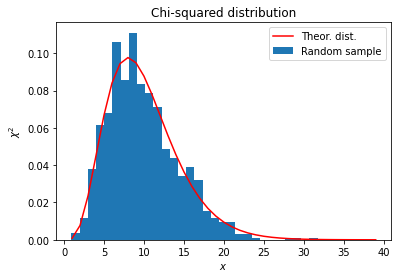

In [4]:
%matplotlib inline
x = np.arange(1, 40)
def chi(x, k):
    res = []
    for xi in x:
        temp = ((.5)**(k/2) / math.gamma(k/2))*xi**(k/2-1) * np.exp(-xi/2)
        res.append(temp)
    return res

k = 10

y = []
norm = stats.norm(0, 1)
for i in range(0,k):
    y.append(norm.rvs(size=1000)**2)
sample = y[0]
for i in range(1,k):
    sample += y[i]
plt.plot(x, chi(x,k), color = 'Red', label = 'Theor. dist.')
plt.hist(sample, density=True, bins=30, label='Random sample')
plt.legend(loc="upper right")
plt.ylabel('$\chi^2$')
plt.xlabel('$x$')
plt.title("Chi-squared distribution")
plt.show()

Видно, что теоретическая кривая неплохо аппроксимирует эксперементальные данные.

<h3> Задание 2 </h3>
Ваша задача — оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок. Для этого при трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения (будьте внимательны с параметрами функции, она принимает на вход не дисперсию, а стандартное отклонение).

<h5> Расчетные параметры</h5><br><br>

Для распределения $\chi^2$ размерности k теоретические среднее и дисперсия равны:<br>
$\mu=k$ и $\sigma^2=2k$<br><br>

Распределение среднего при выборке объема n теоретически примерно описывается функцией нормального распределения:<br>
$$X_n \approx N(\mu, \sigma^2/n) = N(k, 2k/n)$$<br><br>

Таким образом для выборок объемом 5, 10 и 50 имеем:

<h5> Среднее для 5 выборок </h5>

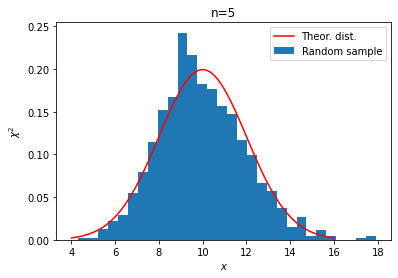

In [5]:
n = 5
av = []
for j in range(1000):
    y = []
    norm = stats.norm(0, 1)
    for i in range(0,k):
        y.append(norm.rvs(size=n)**2)
    sample = y[0]
    for i in range(1,k):
        sample += y[i]
    av.append(np.mean(sample))
plt.hist(av, density=True, bins=30, label = 'Random sample')
plt.ylabel('$\chi^2$')
plt.xlabel('$x$')
plt.title("n=5")


mu = k
variance = 2*k/n
sigma = np.sqrt(variance)
x = np.linspace(4, 16, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), color='Red', label='Theor. dist.')
plt.legend(loc='upper right')
plt.show()

Видно, что теоретическая кривая неплохо аппроксимирует эксперементальные данные. При этом дисперсия довольно велика. Посмотрим, что будет при росте выборки.

<h5> Среднее для 10 выборок </h5>

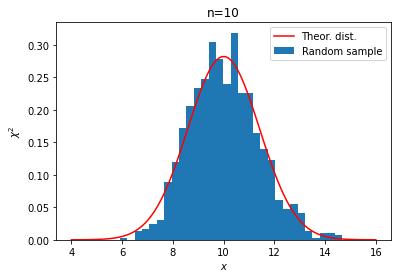

In [6]:
n = 10
av = []
for j in range(1000):
    y = []
    norm = stats.norm(0, 1)
    for i in range(0,k):
        y.append(norm.rvs(size=n)**2)
    sample = y[0]
    for i in range(1,k):
        sample += y[i]
    av.append(np.mean(sample))
plt.hist(av, density=True, bins=30, label='Random sample')
plt.ylabel('$\chi^2$')
plt.xlabel('$x$')
plt.title("n=10")

variance = 2*k/n
sigma = np.sqrt(variance)
x = np.linspace(4, 16, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), color='Red', label='Theor. dist.')
plt.legend(loc='upper right')
plt.show()

Видно, что теоретическая кривая неплохо аппроксимирует эксперементальные данные. При этом график становится более узким, хотя дисперсия все еще велика. Посмотрим на увеличение выборки до 50.

<h5> Среднее для 50 выборок </h5>

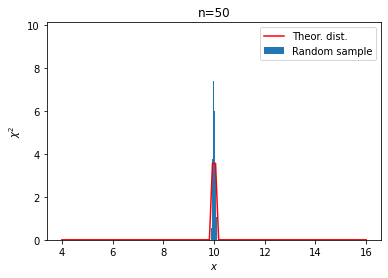

In [8]:
n = 10000
av = []
for j in range(1000):
    y = []
    norm = stats.norm(0, 1)
    for i in range(0,k):
        y.append(norm.rvs(size=n)**2)
    sample = y[0]
    for i in range(1,k):
        sample += y[i]
    av.append(np.mean(sample))
plt.hist(av, density=True, bins=30, label='Random sample')
plt.ylabel('$\chi^2$')
plt.xlabel('$x$')
plt.title("n=50")

variance = 2*k/n
sigma = np.sqrt(variance)
x = np.linspace(4, 16, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), color='Red', label='Theor. dist.')
plt.legend(loc='upper right')
plt.show()

Видно, что теоретическая кривая неплохо аппроксимирует эксперементальные данные. На этом графике видно, что все значения скоцентрированы в наименьшей окрестости матожидания распределения хи-квадрат.

<h3> Задание 3. Выводы </h3>

Сравнивая гистограммы с теоретическими предсказания можем увидеть, что нормальное распределение хорошо аппроксимирует полученные эксперементальные данные в каждом случае. С ростом объема выборки n пропорционально падает дисперсия соответсвующего нормального распределения, иными словами, падает разброс средних значений вокруг теоретического матожидания хи-распределения (график становится более узким). Это значит, что точность аппроксимации распределения выборочных средних нормальным с ростом n заметно растет при росте объема выборки.